In [1]:
# Import libraries
import numpy as np
#import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import import_ipynb
import TP_WeatherAUS as TP
import importlib
importlib.reload(TP)
# Se ignoran los "FutureWarnings" molestos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
# Read cvs file and generate copy
DATASET_PATH = 'weatherAUS.csv'
dataset = pd.read_csv(DATASET_PATH)
dataset_=dataset.copy()

In [3]:
TP.date2columns(dataset_)
    

,Year,MonthDay,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12.03125,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008,12.06250,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008,12.09375,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008,12.12500,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008,12.15625,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017,6.65625,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017,6.68750,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017,6.71875,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017,6.75000,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
dataset_.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [5]:
dataset_.describe()
# Se descartan los años 2007 y 2008 por incompletud.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
dataset_.skew()

MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
dtype: float64

In [7]:
dataset_.kurt(numeric_only=True)

MinTemp           -0.483972
MaxTemp           -0.224630
Rainfall         178.152079
Evaporation       45.043266
Sunshine          -0.829459
WindGustSpeed      1.418642
WindSpeed9am       1.226991
WindSpeed3pm       0.763858
Humidity9am       -0.037555
Humidity3pm       -0.511363
Pressure9am        0.231563
Pressure3pm        0.129172
Cloud9am          -1.538830
Cloud3pm          -1.456525
Temp9am           -0.340523
Temp3pm           -0.136281
dtype: float64

In [8]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
#pd.value_counts(dataset_["Evaporation"]) #continua
#pd.value_counts(dataset_["Sunshine"]) #continua Ojo! Tiene 2356 valores == 0, tiene sentido los valores que tiene? entre 10 y 14
#pd.value_counts(dataset_["WindGustDir"]) # Categorica, 16 valores bien distribuidos(toma en cuenta NNW, etc...)
#pd.value_counts(dataset_["WindSpeed9am"]) # Numerica discreta? Por los valores, parece que en este caso se tomaron medidas sin flotante.
#pd.value_counts(dataset_["Humidity9am"]) # Idem
#pd.value_counts(dataset_["Pressure9am"]) # Numerica continua
#pd.value_counts(dataset_["Cloud9am"]) # Discreta Categorica-Numerica? 
#pd.value_counts(dataset_["Temp9am"]) #Continua


In [10]:
dataset_=TP.date2columns(dataset_)

In [11]:
# Se descartan los años 2007 y 2008 por incompletud.
dataset__=dataset_[dataset_["Year"]!=2007]
dataset__=dataset__[dataset__["Year"]!=2008].sort_values(by="Year").reset_index(inplace=False).drop(columns="index")

In [12]:
dataset__.head()

,Year,MonthDay,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009,1.03125,Albury,11.3,26.5,0.0,NaN,NaN,WNW,56.0,...,46.0,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,No
1,2009,12.34375,Wollongong,17.9,NaN,0.0,NaN,NaN,NaN,NaN,...,31.0,12.0,1013.0,1011.6,NaN,NaN,21.2,27.3,No,NaN
2,2009,12.31250,Wollongong,17.6,27.2,0.0,NaN,NaN,NNW,50.0,...,71.0,82.0,1010.8,1005.4,NaN,NaN,22.4,23.2,No,No
3,2009,12.28125,Wollongong,16.9,23.0,0.0,NaN,NaN,SSE,54.0,...,79.0,67.0,1011.6,1011.1,7.0,NaN,17.7,21.5,No,No
4,2009,12.25000,Wollongong,18.5,25.0,0.0,NaN,NaN,SSE,69.0,...,76.0,69.0,1009.5,1001.3,8.0,NaN,21.2,24.2,No,No


In [13]:
#Se verifican los null para cada columna 
#(en este caso particular busqueda ne null y de nan arrojan el mismo resultado)

for column in dataset__:
   tot=dataset__[column].isnull().sum()
   print(column,"porcentaje de Null",tot/len(dataset__[column])*100)

Year porcentaje de Null 0.0
MonthDay porcentaje de Null 0.0
Location porcentaje de Null 0.0
MinTemp porcentaje de Null 1.0298402140726197
MaxTemp porcentaje de Null 0.875434049004744
Rainfall porcentaje de Null 2.260897512034598
Evaporation porcentaje de Null 43.632667034633094
Sunshine porcentaje de Null 48.56597894207324
WindGustDir porcentaje de Null 6.897973157082073
WindGustSpeed porcentaje de Null 6.854655590411447
WindDir9am porcentaje de Null 7.317874085615074
WindDir3pm porcentaje de Null 2.937909158870669
WindSpeed9am porcentaje de Null 1.2135905372076938
WindSpeed3pm porcentaje de Null 2.126054119011521
Humidity9am porcentaje de Null 1.836804560920568
Humidity3pm porcentaje de Null 3.132838208888485
Pressure9am porcentaje de Null 10.459096339665615
Pressure3pm porcentaje de Null 10.433944204179447
Cloud9am porcentaje de Null 38.782496908383344
Cloud3pm porcentaje de Null 41.199896596776334
Temp9am porcentaje de Null 1.221275911939579
Temp3pm porcentaje de Null 2.510322855605

In [14]:
# muy alta correlación lineal entre Temp9am y MinTemp. También entre Temp3pm y MaxTemp, como es lógico. Podríamos eliminar dos variables
# falta ver que sucede con las categoricas

In [15]:
TP.geoloc(dataset__)

El dataset tiene 49 localidades distintas
(-11, 13) Albury
(-9, 17) Wollongong
(-10, 16) Canberra
(-9, -16) Walpole
(-17, 14) Hobart
(-7, 18) Williamtown
(-10, 14) WaggaWagga
(-7, -11) SalmonGums
(-12, 10) Ballarat
(-11, 11) Bendigo
(-10, 16) Tuggeranong
(-10, 15) MountGinini
(-6, 3) Woomera
(-4, 34) NorfolkIsland
(1, 0) AliceSprings
(-8, 18) NorahHead
(-8, 17) Penrith
(-7, 18) Newcastle
(12, -2) Darwin
(-16, 14) Launceston
(-8, 18) SydneyAirport
(-8, 18) Sydney
(-12, 12) Richmond
(-3, 20) GoldCoast
(-9, -17) Witchcliffe
(5, 13) Townsville
(-2, 20) Brisbane
(8, 12) Cairns
(-12, 8) Dartmoor
(-9, 5) Nuriootpa
(-12, 7) MountGambier
(-9, 5) Adelaide
(-10, -15) Albany
(-12, 11) Melbourne
(-6, -17) Perth
(-9, 9) Mildura
(-13, 14) Sale
(-12, 11) MelbourneAirport
(-6, -16) PearceRAAF
(-12, 12) Watsonia
(-6, -17) PerthAirport
(-13, 8) Portland
(-6, 12) Cobar
(-4, 16) Moree
(-5, 20) CoffsHarbour
(-8, 17) BadgerysCreek
(0, -1) Uluru
(10, 0) Katherine
(-10, 8) Nhil


,Year,MonthDay,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009,1.03125,-11.0,13.0,11.3,26.5,0.0,NaN,NaN,WNW,...,46.0,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,No
1,2009,12.34375,-9.0,17.0,17.9,NaN,0.0,NaN,NaN,NaN,...,31.0,12.0,1013.0,1011.6,NaN,NaN,21.2,27.3,No,NaN
2,2009,12.31250,-9.0,17.0,17.6,27.2,0.0,NaN,NaN,NNW,...,71.0,82.0,1010.8,1005.4,NaN,NaN,22.4,23.2,No,No
3,2009,12.28125,-9.0,17.0,16.9,23.0,0.0,NaN,NaN,SSE,...,79.0,67.0,1011.6,1011.1,7.0,NaN,17.7,21.5,No,No
4,2009,12.25000,-9.0,17.0,18.5,25.0,0.0,NaN,NaN,SSE,...,76.0,69.0,1009.5,1001.3,8.0,NaN,21.2,24.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143124,2017,2.75000,-10.0,16.0,14.8,33.7,0.0,NaN,NaN,E,...,74.0,28.0,1020.4,1016.0,7.0,NaN,19.8,30.3,No,No
143125,2017,2.71875,-10.0,16.0,11.4,35.5,0.0,NaN,NaN,NW,...,62.0,18.0,1018.3,1015.8,NaN,1.0,20.6,34.3,No,No
143126,2017,2.68750,-10.0,16.0,9.8,32.5,0.0,NaN,NaN,NW,...,71.0,24.0,1019.9,1015.5,NaN,NaN,17.5,30.2,No,No
143127,2017,3.15625,-10.0,16.0,12.0,28.5,3.6,NaN,NaN,SSE,...,72.0,34.0,1012.6,1009.9,NaN,NaN,18.4,27.3,Yes,No


In [16]:
dataset__["RainTomorrow"].value_counts()

No     108539
Yes     31347
Name: RainTomorrow, dtype: int64

In [17]:
pd.DataFrame(dataset__["RainTomorrow"]).isna().value_counts()

RainTomorrow
False           139886
True              3243
dtype: int64

In [18]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
aux_=[]
enc = preprocessing.LabelEncoder()
dataset__["RainToday_enc"]=enc.fit_transform(dataset__["RainToday"].values.reshape(-1, 1))
dataset__["RainTomorrow_enc"]=enc.fit_transform(dataset__["RainTomorrow"].values.reshape(-1, 1))
dataset__["WindGustDir_enc"]=enc.fit_transform(dataset__["WindGustDir"].values.reshape(-1, 1))
dataset__["WindDir9am_enc"]=enc.fit_transform(dataset__["WindDir9am"].values.reshape(-1, 1))
dataset__["WindDir3pm_enc"]=enc.fit_transform(dataset__["WindDir3pm"].values.reshape(-1, 1))

C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#completo RainTomorrow con lo RainToday
aux3_=[]
k=0
for i in range(0,len(aux__)):
    try:
        if aux__[0][i]=="Nan" and aux2__[0][i+1]!="Nan":
            k=k+1
            aux3_.append(aux2__[0][i+1])
        else:
            aux3_.append(aux__[0][i])
    except:
        aux3_.append(aux__[0][i])

    
print("La cantidad de valores que pueden ser completados en RainTomorrow",k)
print(pd.DataFrame(aux3_).value_counts())
aux3__=pd.DataFrame(aux3_)



print((len(aux3__[aux3__[0]=="Nan"])/len(aux3__[0]))*100,'versus',(dataset__["RainTomorrow"].isnull().sum()/len(dataset__["RainTomorrow"]))*100)

dataset__["RainTomorrow_enc"].replace({"Nan": np.nan})
dataset__["RainToday_enc"].replace({"Nan": np.nan})
dataset__


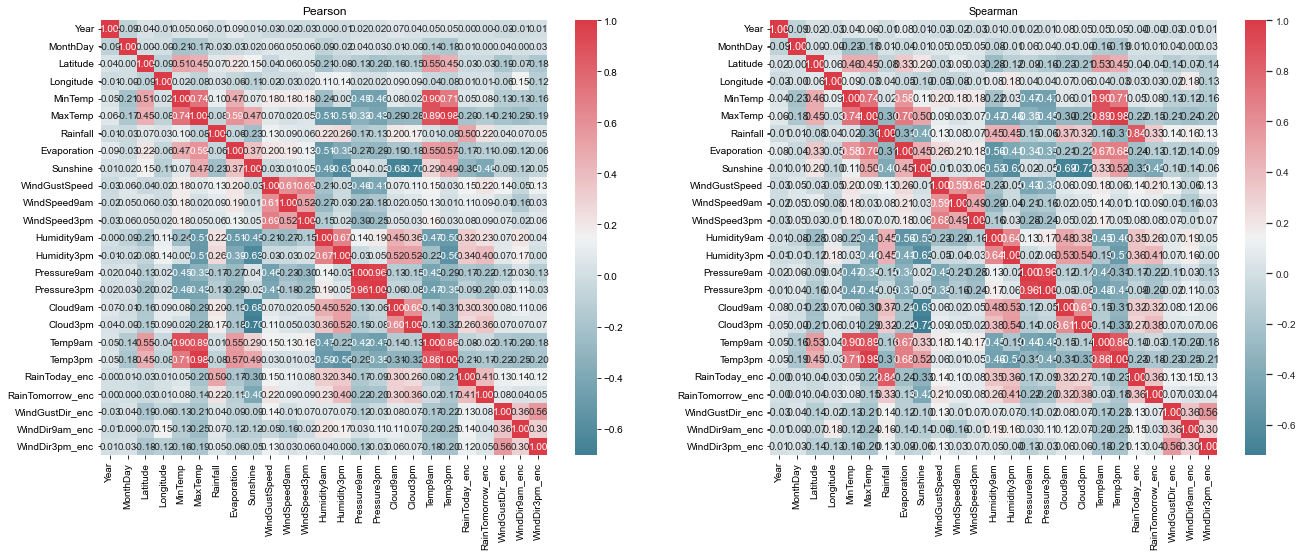

In [19]:
fig, axes = plt.subplots(1,2,figsize=(22,8))

r = dataset__.corr(method='pearson')
axes[0].set_title("Pearson")
sns.heatmap(r, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes[0])
sns.set(font_scale=0.9)

rho = dataset__.corr(method='spearman')
axes[1].set_title("Spearman")
sns.heatmap(rho, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)


In [23]:
# se queda con los años 15,16 y 17 por completitud y suficiencia para el analisis.
dataset_filt=dataset__[dataset__["Year"]>=2015]

In [25]:
#Se verifican los null para cada columna 
#(en este caso particular busqueda ne null y de nan arrojan el mismo resultado)

for column in dataset__:
   tot=dataset__[column].isnull().sum()
   tot2=dataset_filt[column].isnull().sum()
   print(column,"porcentaje de Null antes=",tot/len(dataset__[column])*100, "despues=",tot2/len(dataset_filt[column])*100)

Year porcentaje de Null antes= 0.0 despues= 0.0
MonthDay porcentaje de Null antes= 0.0 despues= 0.0
Latitude porcentaje de Null antes= 0.0 despues= 0.0
Longitude porcentaje de Null antes= 0.0 despues= 0.0
Location porcentaje de Null antes= 0.0 despues= 0.0
MinTemp porcentaje de Null antes= 1.0298402140726197 despues= 1.6853426938481617
MaxTemp porcentaje de Null antes= 0.875434049004744 despues= 1.6358399711984157
Rainfall porcentaje de Null antes= 2.260897512034598 despues= 2.767652220872148
Evaporation porcentaje de Null antes= 43.632667034633094 despues= 54.6870077854282
Sunshine porcentaje de Null antes= 48.56597894207324 despues= 62.614193780657935
WindGustDir porcentaje de Null antes= 6.897973157082073 despues= 5.987579316862427
WindGustSpeed porcentaje de Null antes= 6.854655590411447 despues= 5.940326717969489
WindDir9am porcentaje de Null antes= 7.317874085615074 despues= 6.3475991179514875
WindDir3pm porcentaje de Null antes= 2.937909158870669 despues= 4.1874803114171275
Wind

In [20]:
X=dataset__.drop(columns=['RainTomorrow',"Location","RainToday","WindGustDir","WindDir9am","WindDir3pm"])
y=dataset__['RainTomorrow_enc']

In [21]:
# El metodo solo puede ser utilizado sin los nan
# 
from sklearn.feature_selection import mutual_info_regression
MI = mutual_info_regression(X, y)
fig, ax = plt.subplots(2,1, figsize=(8,6))
ax[0].set_title('Información mutua')
sns.heatmap([MI],ax=ax[0],cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax[0].set_xticklabels(df_train.columns.values[:-1])

ax[1].set_title('Correlación de Pearson')
sns.heatmap([r.iloc[-1][:-1]],cmap=sns.diverging_palette(220,10,as_cmap=True),ax=ax[1], annot=True,fmt=".2f")
ax[1].set_xticklabels(dataset__.columns.values[:-1]);

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').